<a href="https://colab.research.google.com/github/bdgToji/VNP/blob/main/KOL1_Decision_Tree_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 2

Perform hyper-parameter tuning on the DecisionTree algorithm in order to predict the target column "smoking". Use 5-fold cross-validation for the hyper-parameter tuning, tune the parameters "criterion", "max_depth", and "min_samples_split". Provide at least 3 values for each parameter.

## Dataset description

### Features

* id - patient identifier
* age - patient age
* height(cm) - patient height in cm
* weight(kg) - patient weight in kg
* waist(cm) - patient waist diameter in cm
* eyesight(left) - patient eyesight left eye
* eyesight(right) - patient eyesight right eye
* hearing(left) - patient hearing condition left ear
* hearing(right) - patient hearing condition right ear
* systolic - patient systolic blood pressure
* relaxation - patient relaxation blood pressure
* fasting blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - patient dental status



### Target variable
smoking

### Download the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, KFold
from sklearn.metrics import f1_score, classification_report, confusion_matrix, mean_squared_error
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [3]:
! gdown 1tUjwr64Sgv9DlImHSa5exj0Cv6Ngl6CC

Downloading...
From: https://drive.google.com/uc?id=1tUjwr64Sgv9DlImHSa5exj0Cv6Ngl6CC
To: /content/data_g1.csv
100% 9.79M/9.79M [00:00<00:00, 50.9MB/s]


### Read the dataset

In [4]:
df = pd.read_csv('/content/drive/MyDrive/VNP/data_g1.csv')

In [5]:
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
1,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
2,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
3,7,55,155,60,84.5,0.7,0.9,1,1,137,...,51,198,14.5,1,0.7,16,15,16,0,0
4,9,40,155,50,73.0,1.5,1.5,1,1,105,...,55,122,13.2,1,0.7,22,16,14,0,0


In [6]:
df = df.drop(columns=['id'])

In [7]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,...,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000,119603.000000
mean,45.219727,163.775482,65.460080,82.100653,0.990653,0.984779,1.025911,1.025367,122.200396,76.493441,...,57.282677,115.370058,14.553406,1.077364,0.874245,25.297559,25.464194,32.554025,0.182052,0.250830
std,12.019891,9.060404,12.547429,9.062907,0.407614,0.400383,0.158870,0.157239,13.018763,9.106010,...,14.272188,28.504080,1.471435,0.354414,0.185319,9.364472,17.450445,28.076767,0.385889,0.433493
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,44.000000,...,9.000000,15.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,155.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,113.000000,70.000000,...,46.000000,95.000000,13.500000,1.000000,0.700000,20.000000,16.000000,17.000000,0.000000,0.000000
50%,45.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,121.000000,77.000000,...,55.000000,115.000000,14.700000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,134.000000,15.700000,1.000000,1.000000,29.000000,31.000000,39.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,133.000000,...,136.000000,1860.000000,20.400000,6.000000,9.900000,778.000000,2914.000000,926.000000,1.000000,1.000000


In [8]:
df.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

### Check if dataset is balanced, or if not applicable give your reasons why



<Axes: >

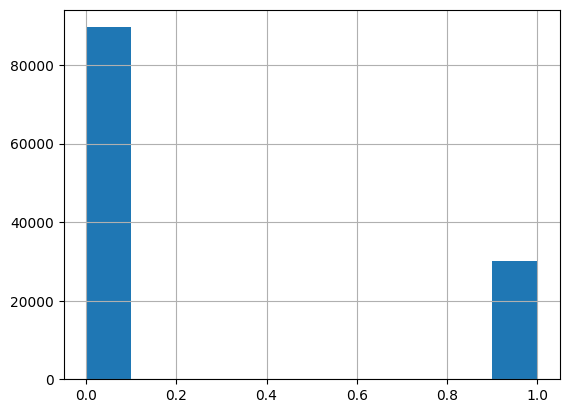

In [9]:
df['smoking'].hist()

Not balanced

### Perform all necessary transformations of the data

In [10]:
X, Y = df.drop(columns=['smoking']), df['smoking']

In [11]:
model = KFold(5)

### Hyper-parameter tuning and cross-validation

Choose a metric to optimize, choose hyper parameter values to experiment with, perform 5-fold cross-validation.

In [12]:
params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [3, 5, 7],
    "min_samples_split": range(20, 50, 5)
}

In [13]:
best_score = -1
best_crit = -1
best_depth = -1
best_split = -1
for criterion in params['criterion']:
  for max_depth in params['max_depth']:
    for min_samples_split in params['min_samples_split']:
      classiffier = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split)
      pred = cross_val_predict(classiffier, X, Y, cv=model)
      f = f1_score(Y, pred)
      if f > best_score:
        best_score=f
        best_crit=criterion
        best_depth=max_depth
        best_split=min_samples_split

In [14]:
best_crit, best_depth, best_split

('entropy', 3, 20)

In [15]:
classiffier = DecisionTreeClassifier(criterion=best_crit, max_depth=best_depth, min_samples_split=best_split)

In [16]:
pred = cross_val_predict(classiffier, X, Y, cv=model)

### Evaluate the performance of the best model using multiple metrics

In [17]:
print(classification_report(Y,pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79     89603
           1       0.19      0.11      0.14     30000

    accuracy                           0.66    119603
   macro avg       0.47      0.48      0.46    119603
weighted avg       0.60      0.66      0.63    119603



Calculate metrics

Display a confusion matrix if applicable

In [27]:
metrics.confusion_matrix(Y, pred)

array([[75624, 13979],
       [26672,  3328]])